# EVERYTHING IS CHAOS

In [40]:
import igraph as ig
import networkx as nx
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Data

In [41]:
df = pd.read_csv("/Users/rachelroca/Documents/GitHub/DAAAAMNdjmm/data cleaning/Final Coding.csv",keep_default_na=False)
#The codes were in 5 different columns; lets aggregate them into a new column
df["all codes"] = df[["SO code","BC code","BtC code","CCM code","SJEDI code"]].agg(';'.join,axis=1)
#We separated them by ;, so convert to an array 
df["all codes"] = df["all codes"].apply(lambda s: s.split(';'))
#Strip out leading/trailing spaces
df["all codes"] = df["all codes"].apply(lambda s: [t.strip() for t in s if t])
#Sort the arrays, so we can be confident the same things are not listed in two different ways
df["all codes"] = np.array(df["all codes"].apply(sorted))

In [42]:
tweeters = df['user_username'].unique()
codes = ['advocacy', 'amplification', 'emotional support', 'gender', 'indigenous', 'jmm experience', 'representation', 'bipoc', 'hashtags', 'influencers', 'power', 'talk support', 'humanize', 'math practice', 'current events', 'lgbtq', 'strategic planning', 'allyship in math', 'math experience', 'conversation', 'thankful', 'BC impact', 'disrupteverything', 'SJEDI impact', 'SO impact', 'belonging', 'learning', 'troll', 'CC impact', 'virtual participation', 'activation', 'futures', 'economic', 'beyond', 'celebration']


In [43]:
df_codes = pd.DataFrame(columns = codes)
num_tweets_retweets = np.zeros(len(tweeters))
for i in range(len(tweeters)):
    df_temp = df[df['user_username'] == tweeters[i]]
    num_tweets_retweets[i] = len(df_temp)
    #sum the all codes column
    codes_sum_temp = df_temp['all codes'].sum()
    #make a dictionary of the codes and how many times they appear in codes_sum_temp
    codes_dict_temp = {i:codes_sum_temp.count(i) for i in codes}
    #make the dictionary a dataframe
    codes_dict_temp_df = pd.DataFrame.from_dict([codes_dict_temp])
    #add the dictionary to the dataframe
    df_codes = pd.concat([df_codes,codes_dict_temp_df], ignore_index=True)
#make the indices the tweeters' names
df_codes.index = tweeters

In [44]:
#make the dataframe into a numpy array
df_codes_array = df_codes.to_numpy()
df_codes_array=df_codes_array.astype('i')

In [45]:
#let's try normalizing because data be wild
#divide each row by the number of tweets/retweets
df_codes_array_norm_tweet = np.zeros((len(tweeters),len(codes)))
for i in range(len(tweeters)):
    df_codes_array_norm_tweet[i] = df_codes_array[i]/num_tweets_retweets[i]

## Mapper

In [46]:
#getting the filter function
def l1_norm(X):
    #take the l1 norm of each row
    return np.linalg.norm(X, ord=1, axis=1).reshape(-1, 1)

def linf_norm(X):
    #take the l1 norm of each row
    return np.linalg.norm(X, ord=np.inf, axis=1).reshape(-1, 1)

from sklearn.preprocessing import FunctionTransformer
l1_norm_trans = FunctionTransformer(l1_norm)

linf_norm_trans = FunctionTransformer(linf_norm)

In [58]:
import gtda.mapper as map
import sklearn.cluster as cluster


filter_func = l1_norm_trans
cover = map.OneDimensionalCover(kind='uniform', n_intervals=30, overlap_frac=0.4)
clusterer = cluster.DBSCAN()

pipe = map.make_mapper_pipeline(
    filter_func=filter_func,
    cover=cover,
    clusterer=clusterer,
    verbose=False,
    n_jobs=1,
)

fig = map.plot_static_mapper_graph(pipe, df_codes_array)
fig.show(config={'scrollZoom': True})
g = pipe.fit_transform(df_codes_array)

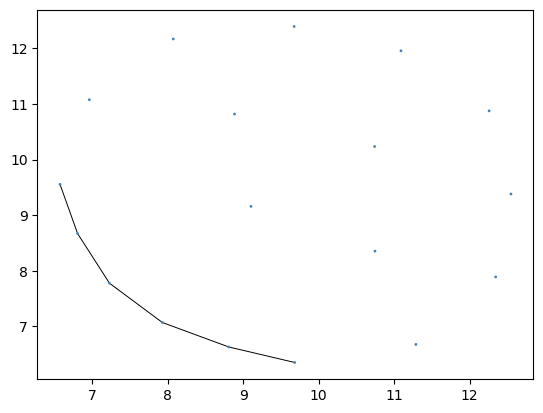

In [59]:
fig, ax = plt.subplots()
ig.plot(g,target=ax,palette=ig.RainbowPalette(),
    vertex_size=1,
    edge_width=0.7)
plt.show()

In [60]:
G = g.to_networkx()
fuck_this = nx.connected_components(G)
len(list(fuck_this))

13

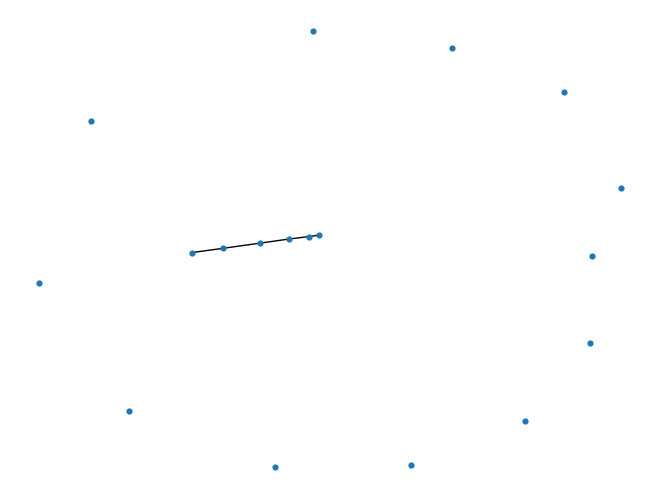

In [61]:
#plot G
nx.draw(G, node_size = 12)

In [51]:
#connected components igraph
fuck_me = ig.Graph.components(g)
print(fuck_me)

Clustering with 29 elements and 14 clusters
[ 0] 0, 1, 2, 3, 5, 6, 7, 8, 9, 13, 15, 16, 18
[ 1] 4
[ 2] 10, 11, 23
[ 3] 12
[ 4] 14
[ 5] 17
[ 6] 19
[ 7] 20
[ 8] 21
[ 9] 22
[10] 24
[11] 25, 26
[12] 27
[13] 28


In [52]:
nints= np.arange(5,55,5)
olfrac = np.arange(0.1,.6,0.05)
filter_func = l1_norm_trans

for i in nints:
    for j in olfrac:
        cover = map.OneDimensionalCover(kind='uniform', n_intervals=int(i), overlap_frac=j)
        clusterer = cluster.DBSCAN()

        pipe = map.make_mapper_pipeline(
            filter_func=filter_func,
            cover=cover,    
            clusterer=clusterer,
            verbose=False,
            n_jobs=1,
        )

        fig = map.plot_static_mapper_graph(pipe, df_codes_array_norm_tweet)
        #fig.show(config={'scrollZoom': True})
        fig.write_image('figures/ints_'+str(i)+'_olfrac'+str(j)+'.png')
        graph = pipe.fit_transform(df_codes_array_norm_tweet)
    

AttributeError: type object 'igraph._igraph.GraphBase' has no attribute 'connected_components'